In [2]:
import numpy as np 
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리

from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score


# LightGBM 임포트
from lightgbm import LGBMClassifier # LightGBM 불러오기 (LightGBM의 파이썬 패키지인 lightgbm에서 LGBMclassifier import)

from pandas.core.common import random_state


import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd


# 모델 평가를 위한 metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, plot_confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
from google.colab import drive # gdrive 연동
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Disease 

df2 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/aiffel_data/Hackerton_2/data_over_sampling.csv', encoding='cp949') # upsampling 안된 것!
df2

,SEX,BTH_G,SBP,DBP,FBS,BMI,Dis
0,1,1,116,78,94,16.6,0
1,1,1,100,60,79,22.3,0
2,1,1,100,60,87,21.9,0
3,1,1,111,70,72,20.2,0
4,1,1,120,80,98,20.0,0
...,...,...,...,...,...,...,...
1481319,0,25,120,80,78,27.9,1
1481320,0,27,150,74,133,32.0,1
1481321,1,25,120,70,118,26.9,1
1481322,0,20,136,68,93,21.5,1


In [5]:
df2.notnull().sum()

SEX      1481324
BTH_G    1481324
SBP      1481324
DBP      1481324
FBS      1481324
BMI      1481324
Dis      1481324
dtype: int64

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481324 entries, 0 to 1481323
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1481324 non-null  int64  
 1   BTH_G   1481324 non-null  int64  
 2   SBP     1481324 non-null  int64  
 3   DBP     1481324 non-null  int64  
 4   FBS     1481324 non-null  int64  
 5   BMI     1481324 non-null  float64
 6   Dis     1481324 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 79.1 MB


In [8]:
# feature와 target 분리(설명변수 및 목표변수 분리)
x = df2.drop(['Dis'], axis=1) # df[df.columns.difference(['target'])]
y = np.array(df2['Dis']) # y = df['target']

# Feature Scaling (standardScaler)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x)
x_test = sc.transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42) # 기본 0.25
# x_test,x_val,y_test,y_val=train_test_split(x,y,test_size=0.1, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# print(x_val.shape)
# print(y_val.shape)

(1110993, 6)
(1110993,)
(370331, 6)
(370331,)


lightgbm 하이퍼 파라미터 튜닝


In [ ]:
# 참고할 파라미터 튜닝

In [ ]:
# hyper_params = {
#     'n_estimators': 100, # 400 # 사이킷런 래퍼 (파이썬 래퍼에서는 num_iterations) n_estimators 학습할때 사용하는 트리의 갯수. num_iteration은 prediction할때 사용하는 트리의 갯수
#     'num_iterations': 28000, # 파이썬 래퍼에서 import를 했으므로 이게 사용된다.
#     'task': 'train',
#     'boosting_type': 'gbdt',
#     'objective': 'multiclass', # 이진 분류일때는 binary, 다중 분류일때는 multiclass
#     'metric': 'multi_logloss', # ['auc_mu', 
#     'learning_rate': 0.1, # 0.005
#     'feature_fraction': 1.0, # 0.9
#     'bagging_fraction': 1.0, # 0.7
#     'bagging_freq': 10,
#     # 'verbose': 0,
#     'max_depth': 8, # 20
#     # 'min_data' : 20
#     # 'min_child_samples' =60
#     'num_leaves': 128, # 31
#     'max_bin': 512, # 255
#     # 'device' : 'gpu'
# }

In [31]:
hyper_params = {
    'n_estimators' : 100, # 400 
    'num_iterations' : 28000, # 파이썬 래퍼에서 import를 했으므로 이게 사용된다.
    'learning_rate' : 0.05, 
    'max_depth' : 3 
}

In [32]:
lgbm_wrapper = LGBMClassifier(**hyper_params)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(x_train, y_train), (x_test, y_test)]
lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(x_test)
pred_proba = lgbm_wrapper.predict_proba(x_test)[:, 1]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[4677]	training's binary_logloss: 0.42829	training's binary_logloss: 0.42829	valid_1's binary_logloss: 0.433216	valid_1's binary_logloss: 0.433216
[4678]	training's binary_logloss: 0.428289	training's binary_logloss: 0.428289	valid_1's binary_logloss: 0.433215	valid_1's binary_logloss: 0.433215
[4679]	training's binary_logloss: 0.428288	training's binary_logloss: 0.428288	valid_1's binary_logloss: 0.433215	valid_1's binary_logloss: 0.433215
[4680]	training's binary_logloss: 0.428288	training's binary_logloss: 0.428288	valid_1's binary_logloss: 0.433215	valid_1's binary_logloss: 0.433215
[4681]	training's binary_logloss: 0.428287	training's binary_logloss: 0.428287	valid_1's binary_logloss: 0.433214	valid_1's binary_logloss: 0.433214
[4682]	training's binary_logloss: 0.428286	training's binary_logloss: 0.428286	valid_1's binary_logloss: 0.433214	valid_1's binary_logloss: 0.433214
[4683]	training's binary_logloss: 0.428285	training's binary_logloss: 0.

In [34]:
lgb_pred = lgbm_wrapper.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(lgb_pred, y_test)
print('LightGBM accuracy score: {0:0.4f}'.format(accuracy_score(y_test, lgb_pred)))

LightGBM accuracy score: 0.7961


In [39]:
# Training set score
y_pred_train = lgbm_wrapper.predict(x_train)
print('LightGBM Model training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# Testing set score
accuracy = accuracy_score(lgb_pred, y_test)
print('LightGBM Model testing-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, lgb_pred)))

LightGBM Model training-set accuracy score: 0.7993
LightGBM Model testing-set accuracy score: 0.7961


In [40]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lgb_pred)
print('Confusion matrix\n\n', cm)
# print('\nTrue Positives(TP) = ', cm[0,0])
# print('\nTrue Negatives(TN) = ', cm[1,1])
# print('\nFalse Positives(FP) = ', cm[0,1])
# print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[140381  44373]
 [ 31122 154455]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79    184754
           1       0.78      0.83      0.80    185577

    accuracy                           0.80    370331
   macro avg       0.80      0.80      0.80    370331
weighted avg       0.80      0.80      0.80    370331



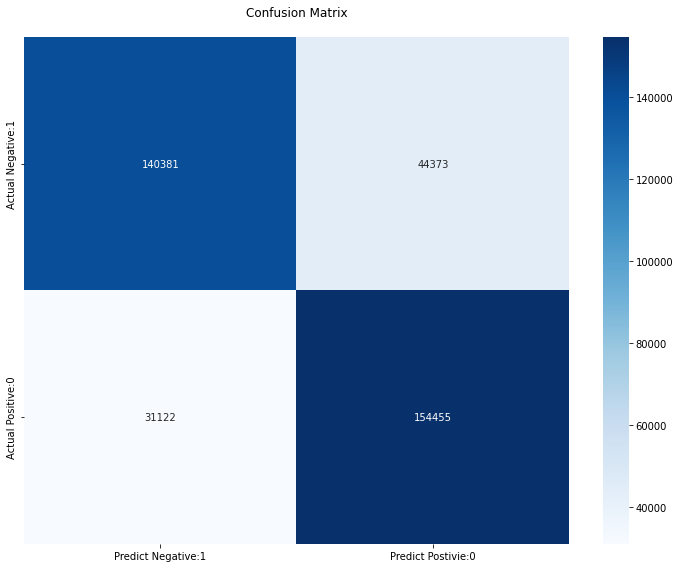

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
cm = confusion_matrix(y_test, lgb_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:1', 'Predict Postivie:0'],
                                 index=['Actual Negative:1', 'Actual Positive:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix\n")
plt.tight_layout()